### Analyse home use of robotic device


*import libraries*

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import math
import statistics
import sqlite3 as sl
from functools import reduce
import dataframe_image as dfi

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 500

In [4]:
os.getcwd()

'C:\\Users\\USER\\Documents\\Articares\\CHISEL'

In [5]:
start_codes=datetime.now()

**connect/query from database**

In [6]:
# con = sl.connect('D:/Articares/CARE_platform/OneDrive_1_4-11-2022/articaresLite_v2_CHISEL_HOME_P001.db')

In [7]:
# # query only from P001
# df = pd.read_sql("SELECT PatientID, SessionID, GameID, TimeStampDate, TimeStampMS, VisualTargetXCoord, VisualTargetYCoord, TargetXCoord, TargetYCoord, XCoordinate, YCoordinate, KxGain, KyGain, KxyGain, TotalForce, VelocityX, VelocityY, CurrentSenseLeft, CurrentSenseRight, Sparc FROM TargetFeedbackDataModel WHERE PatientID='TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==' ",con)

In [8]:
# df.head()

*save queried results*

In [9]:
# df.to_csv('./data/sql_result_P001.dat')

**import df from previously saved query**

In [10]:
# # read .dat file if df is saved
# df = pd.read_csv('./data/sql_result_P001.dat', header=[0])
# df.drop(columns=['Unnamed: 0'],inplace=True)

df = pd.read_csv('./data/sql_result_onlyP001.txt')

In [11]:
df.head()

,PatientID,SessionID,GameID,TimeStampDate,TimeStampMS,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,XCoordinate,YCoordinate,KxGain,KyGain,KxyGain,TotalForce,VelocityX,VelocityY,CurrentSenseLeft,CurrentSenseRight,Sparc
0,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,1,2022-03-10 11:13:37,5675311,171.0,50.0,0.0,0.0,0.170526,0.089900,0.0,0.0,0.0,0.0,0.040212,0.331752,-0.0144,-0.0176,0.0
1,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,1,2022-03-10 11:13:37,5675316,171.0,50.0,0.0,0.0,0.170777,0.091659,0.0,0.0,0.0,0.0,0.043982,0.340549,-0.0144,-0.0176,0.0
2,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,1,2022-03-10 11:13:37,5675316,171.0,50.0,0.0,0.0,0.170777,0.091659,0.0,0.0,0.0,0.0,0.043982,0.340549,-0.0144,-0.0176,0.0
3,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,1,2022-03-10 11:13:37,5675326,171.0,50.0,0.0,0.0,0.171229,0.095278,0.0,0.0,0.0,0.0,0.046496,0.353115,0.0016,-0.0336,0.0
4,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,1,2022-03-10 11:13:37,5675351,171.0,50.0,0.0,0.0,0.172536,0.104728,0.0,0.0,0.0,0.0,0.052779,0.379504,0.0016,-0.0336,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457826 entries, 0 to 1457825
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   PatientID           1457826 non-null  object 
 1   SessionID           1457823 non-null  object 
 2   GameID              1457826 non-null  int64  
 3   TimeStampDate       1457826 non-null  object 
 4   TimeStampMS         1457826 non-null  int64  
 5   VisualTargetXCoord  1457826 non-null  float64
 6   VisualTargetYCoord  1457826 non-null  float64
 7   TargetXCoord        1457826 non-null  float64
 8   TargetYCoord        1457826 non-null  float64
 9   XCoordinate         1457826 non-null  float64
 10  YCoordinate         1457826 non-null  float64
 11  KxGain              1457826 non-null  float64
 12  KyGain              1457826 non-null  float64
 13  KxyGain             1457826 non-null  float64
 14  TotalForce          1457826 non-null  float64
 15  VelocityX      

**patient dictionary**

In [13]:
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
}; 


*replace PatientID from user_id_dict*

In [14]:
# df['PatientID'].unique()

for eg, if 'onlyP001' ie., only one patient is queried, then there should only be one unique value.

In [15]:
# replace PatientID with username
df.replace({'PatientID':user_id_dict},inplace=True)

In [16]:
# check PatientID replace
# df['PatientID'].unique()

**convert datetime**

In [17]:
df['date_time'] = pd.to_datetime(df['TimeStampDate'], format='%Y-%m-%d %H:%M:%S')
# df['date_time']

In [18]:
# check date_time column
# df['date_time'].dtypes

**check df for duplicates**
<br> TimeStampMS
<br> SessionID

In [19]:
# df['TimeStampMS'].duplicated().value_counts()[True]

too many duplicates of TimeStampMS, since it is time (in ms) from datetime run time.

In [20]:
# df['SessionID'].unique()

In [21]:
# there is 'null' in 'SessionID'
df['SessionID'].isnull().sum()

3

In [22]:
# where is the 'SessionID' missing
# df[df['SessionID'].isnull()]

some 'SessionID' are missing, nothing we can do about it, though possible to impute from neighbouring rows.

In [23]:
# remove SessionID when null
df = df[df['SessionID'].notna()]

**format VisualTargetCoord and TargetCoord**

In [24]:
df['VisualTargetXCoord'] = df['VisualTargetXCoord']/1000
df['VisualTargetYCoord'] = df['VisualTargetYCoord']/1000
df['TargetXCoord'] = df['TargetXCoord']/1000
df['TargetYCoord'] = df['TargetYCoord']/1000

**if no issues with data loggin in database, multi index df belows works even faster**

count/count are arbitrarily chosen from highest count.
<br> only numeral items are taken into account
<br> top: most common value
<br> freq: most common value's freq
<br> timestamps: first and last items

In [25]:
# # creating multi index df
# main = df[['PatientID','SessionID','GameID','date_time']].groupby(by=['PatientID','SessionID','GameID']).describe().sort_values([('date_time','first')])
# main

In [26]:
# main.index.names

In [27]:
# main.index.values

Unfortunately, due to incorrect 'SessionID' identifiers, it is NOT that easy to use above df to identify start/end times of each gameplay. So use index as replacement for order of gameplay.

*GameID*

In [28]:
game_id_dict = {
    0 : 'Explore the World',
    1 : 'Fishing Game',
    2 : 'Drone Game'
}

In [29]:
# check types of games played
df['GameID'].unique()

array([1, 0, 2], dtype=int64)

### Segregating dataset by session and game

In [30]:
# make copy of original df
df1 = df.reset_index()

In [31]:
# # keep only patient of interest (if P001), drop everything else
# # does not matter if early queries only on one patient
# searchfor = ['Test_','NULL','003','002']
# df1 = df1[df1['PatientID'].str.contains('Test_|NULL')==False].reset_index()
# df1

In [32]:
df1['TimeStampMS_diff'] = df1[['TimeStampMS']].diff()

In [33]:
# checking when 'TimeStampMS_diff' < 0, indicating new session/game start, even when device is left on overnight
temp1 = df1.loc[df1['TimeStampMS_diff'] < 0]
# temp1

In [34]:
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

**checking for new starts within one session**

In [35]:
for session in list_sessions:
    if len(temp1[temp1['SessionID']==session]) == 0:
        pass
        
    elif len(temp1[temp1['SessionID']==session]) == 1:
        '''this is important to check where the start is'''
        '''if in the begininning, no big deal'''
        temp2 = df1[df1['SessionID']==session].reset_index()
        # first index
        if temp2[['TimeStampMS_diff']].iloc[0].values[0] < 0:
            pass
        # last index
        elif temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0:
            idx=temp2[['index']].iloc[-1].values[0]
            df1.drop(df1[(df1['index'] == idx)].index,axis=0,inplace=True)
        # middle index    
        else:
            idx_start=temp2.loc[temp2['TimeStampMS_diff'] < 0]['index'].values[0]
            idx_end=temp2[['index']].iloc[-1].values[0]
            df1.loc[(df1['index'] >= idx_start) & (df1['index'] <= idx_end), 'SessionID'] = 'newsession'
            
    elif len(temp1[temp1['SessionID']==session]) == 2:
        '''this needs to check whether it is beginning or end'''
        '''if in the middle, sessionid is split'''
        temp2 = df1[df1['SessionID']==session].reset_index()
        # first index
        if temp2[['TimeStampMS_diff']].iloc[0].values[0] < 0:
            pass
        # last index
        if temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0:
            idx=temp2[['index']].iloc[-1].values[0]
            df1.drop(df1[(df1['index'] == idx)].index,axis=0,inplace=True)
        # middle index    
        if (temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0) and (temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0):
            pass
        else:
            idx_start=temp2.loc[temp2['TimeStampMS_diff'] < 0]['index'].values[1]
            idx_end=temp2[['index']].iloc[-1].values[0]
            df1.loc[(df1['index'] >= idx_start) & (df1['index'] <= idx_end), 'SessionID'] = 'anewsession'
    
    elif len(temp1[temp1['SessionID']==session]) == 3:
        '''this assumes there THREE means a correct start, incorrect sessionid end, AND a start in the middle'''
        temp2 = df1[df1['SessionID']==session].reset_index()
        # first index
        if temp2[['TimeStampMS_diff']].iloc[0].values[0] < 0:
            pass
        # last index
        if temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0:
            idx=temp2[['index']].iloc[-1].values[0]
            df1.drop(df1[(df1['index'] == idx)].index,axis=0,inplace=True)
        # middle index    
        idx_start=temp2.loc[temp2['TimeStampMS_diff'] < 0]['index'].values[1]
        idx_end=temp2[['index']].iloc[-1].values[0]
        df1.loc[(df1['index'] >= idx_start) & (df1['index'] <= idx_end), 'SessionID'] = 'ohnewsession'
    
    elif len(temp1[temp1['SessionID']==session]) > 3:
        '''trouble here'''
        print('>3 new starts in session. Please manual check!')

*double checking session happens once for 'TimeStampMS_diff' < 0*

In [36]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

for session in list_sessions:
    if (len(df1.loc[(df1['TimeStampMS_diff'] < 0) & (df1['SessionID']==session)])) > 1:
        print('!! >3 new starts in session. Please manual check !!')

In [37]:
# keep sessions in df within a list
df_session = []
for session in list_sessions:
    temp = df1[df1['SessionID']==session]  
    
    # triple check for false starts
    time_diff = temp[['TimeStampMS']].iloc[-1][0] - temp[['TimeStampMS']].iloc[-2][0]
#     print(time_diff)
    temp.drop(temp.index[[-1]],axis=0,inplace=True) 
    df_session.append(temp)

### EDA

#### time duration


**declare path for saving fig**
<br> path/folder will change later, and declared again later

In [38]:
patientid = df['PatientID'].unique()[0]
results_path = os.path.join('data', 'results', patientid)
if not os.path.exists(results_path):
    os.makedirs(results_path)

*create dataframe*

In [39]:
# sessions have increased, since new session are created when new starts to gameplay were detected
len(df_session)

22

In [40]:
# number of games played
df1['GameID'].unique()

array([1, 0, 2], dtype=int64)

In [41]:
session_nr = []
game_nr = []
start = []
end = []
diff = []
for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            session_nr.append(session)
            game_nr.append(game)
            temp = df[df['GameID']==game]
            start.append(temp[['date_time']].iloc[0][0])
            end.append(temp[['date_time']].iloc[-1][0])
            time_diff = (temp[['date_time']].iloc[-1][0]) - (temp[['date_time']].iloc[0][0])
            diff.append(time_diff/ np.timedelta64(1,'m'))    # in minutes
        

In [42]:
# put in df
time_session = []
for row in range(0,len(session_nr)):
    time_session.append(row)
time_session = pd.DataFrame(time_session,columns=['session_nr'])   
time_session['session_nr'] = session_nr
time_session['game_nr'] = game_nr
time_session['start'] = start
time_session['end'] = end
time_session['diff'] = diff  # in minutes
time_session['just_date'] = time_session['start'].dt.date

In [43]:
# time_session

In [44]:
# dfi.export(time_session,"time_session.png")
# dfi.export(time_session[time_session['game_nr']==0],"time_explore.png")
# dfi.export(time_session[time_session['game_nr']==1],"time_fish.png")
# dfi.export(time_session[time_session['game_nr']==2],"time_drone.png")

##### time spend per session

In [45]:
time_groupsession = time_session.groupby(['just_date']).sum().reset_index()
time_groupsession.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,12.383333
1,2022-03-11,32.066667
2,2022-03-12,61.066667
3,2022-03-15,31.700000
4,2022-03-16,10.033333
5,2022-03-17,37.716667
6,2022-03-21,50.600000
7,2022-03-22,31.866667
8,2022-03-23,31.083333
9,2022-03-24,22.083333


**number of active days playing**

In [46]:
active_days = time_groupsession['just_date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 11 days


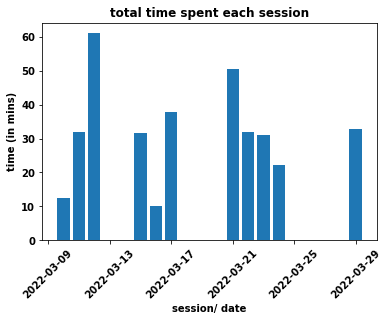

In [47]:
# plot number of games by session
plt.bar(time_groupsession['just_date'],time_groupsession['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.title('total time spent each session');

plt.savefig(results_path + '\\total_time_session.png',bbox_inches = "tight")
plt.show();

##### total time spent on play

In [48]:
total_time = time_session[['diff']].sum()
print(f'total time spent = {total_time[0]:.2f} mins')

total time spent = 353.38 mins


In [49]:
days = math.floor(total_time[0] / (24*60))
leftover_minutes = total_time[0] % (24*60)

hours = math.floor(leftover_minutes / 60)
mins = total_time[0] - (days*1440) - (hours*60)

print(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')

total time spent = 0 days, 5.00 hours, 53.38 mins


##### time spend by game

In [50]:
time_gamesession = time_session.groupby(['game_nr']).sum().reset_index()
time_gamesession.index = time_gamesession.index.map(game_id_dict)
time_gamesession.drop(columns=['session_nr'])

,game_nr,diff
Explore the World,0,142.133333
Fishing Game,1,103.683333
Drone Game,2,107.566667


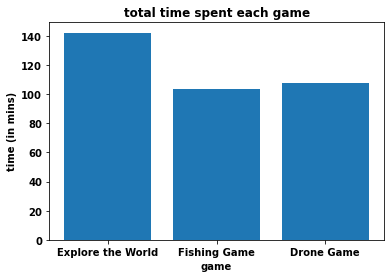

In [51]:
# plot number of games by session
plt.bar(time_gamesession.index,time_gamesession['diff']);
plt.xlabel('game')
plt.ylabel('time (in mins)');
plt.title('total time spent each game');

plt.savefig(results_path + '\\total_time_game.png',bbox_inches = "tight")
plt.show();

##### session dates by game

In [52]:
date_game0 = time_session[time_session['game_nr']==0].groupby(['just_date']).sum().reset_index()
date_game0.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,6.133333
1,2022-03-11,21.533333
2,2022-03-12,20.583333
3,2022-03-15,11.400000
4,2022-03-16,10.033333
5,2022-03-17,17.533333
6,2022-03-21,13.566667
7,2022-03-22,10.366667
8,2022-03-23,10.150000
9,2022-03-24,10.366667


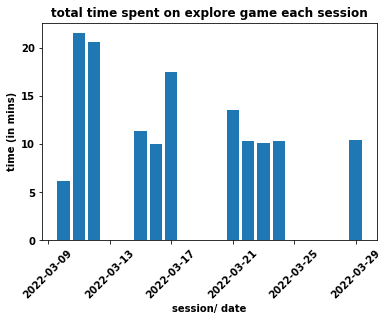

In [53]:
# plot explore game play by session
plt.bar(date_game0['just_date'],date_game0['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on explore game each session');

plt.savefig(results_path + '\\total_time_explore.png',bbox_inches = "tight")
plt.show();

In [54]:
date_game1 = time_session[time_session['game_nr']==1].groupby(['just_date']).sum().reset_index()
date_game1.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,0.133333
1,2022-03-11,5.350000
2,2022-03-12,20.216667
3,2022-03-15,10.050000
4,2022-03-17,10.116667
5,2022-03-21,17.433333
6,2022-03-22,11.316667
7,2022-03-23,10.366667
8,2022-03-24,6.583333
9,2022-03-29,12.116667


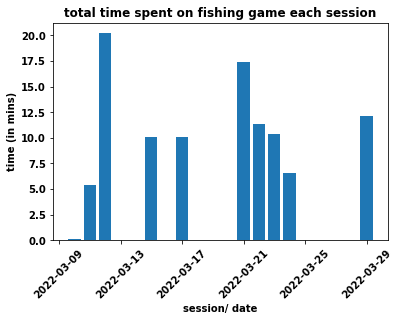

In [55]:
# plot explore game play by session
plt.bar(date_game1['just_date'],date_game1['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on fishing game each session');

plt.savefig(results_path + '\\total_time_fish.png',bbox_inches = "tight")
plt.show();

In [56]:
date_game2 = time_session[time_session['game_nr']==2].groupby(['just_date']).sum().reset_index()
date_game2.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,6.116667
1,2022-03-11,5.183333
2,2022-03-12,20.266667
3,2022-03-15,10.250000
4,2022-03-17,10.066667
5,2022-03-21,19.600000
6,2022-03-22,10.183333
7,2022-03-23,10.566667
8,2022-03-24,5.133333
9,2022-03-29,10.200000


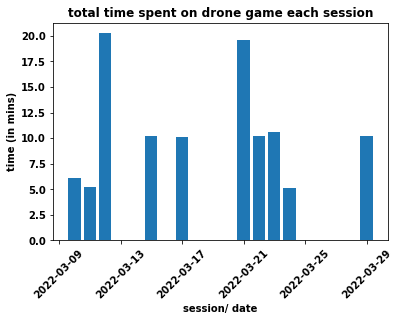

In [57]:
# plot explore game play by session
plt.bar(date_game2['just_date'],date_game2['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on drone game each session');

plt.savefig(results_path + '\\total_time_drone.png',bbox_inches = "tight")
plt.show();

**plot all games by session**

In [58]:
dfs = reduce(lambda x,y: pd.merge(x,y, on='just_date', how='outer'), [date_game0, date_game1, date_game2])
dfs = dfs.fillna(0)
dfs.drop(columns=['session_nr_x','session_nr_y','session_nr','game_nr_x','game_nr_y','game_nr'],inplace=True)

In [59]:
dfs.rename(columns={'diff_x': 'explore',
                    'diff_y': 'fish',
                   'diff': 'drone'}, inplace=True)
dfs = dfs.set_index(['just_date'])
# dfs

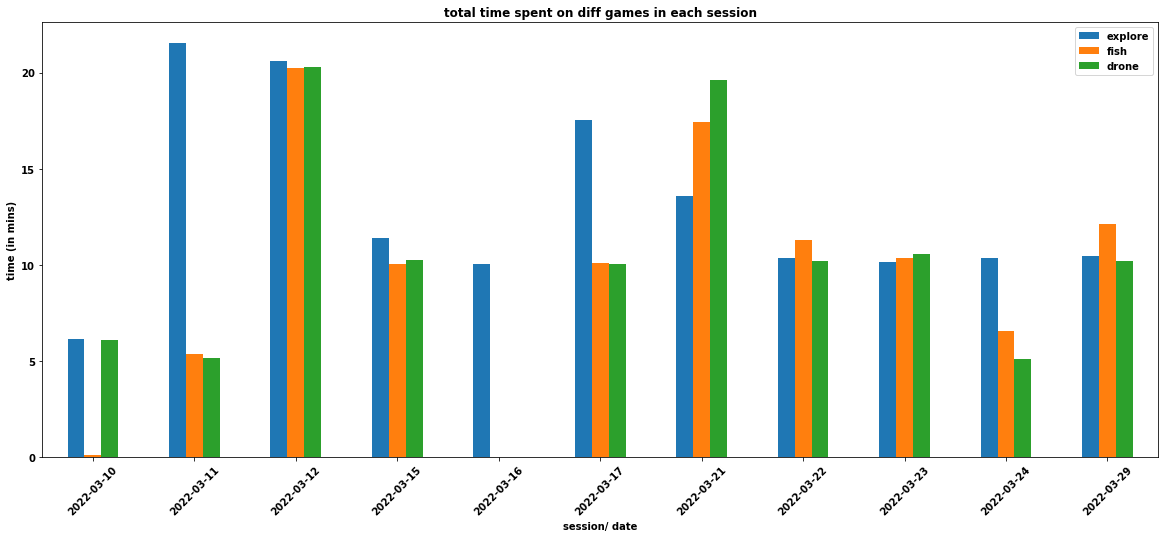

In [60]:
dfs.plot.bar(figsize=(20,8))
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on diff games in each session');

plt.savefig(results_path + '\\total_time_game_separate.png',bbox_inches = "tight")
plt.show();

##### number of times each game was played

In [61]:
time_gamecount = time_session.groupby(['game_nr']).count().reset_index()
time_gamecount.index = time_gamecount.index.map(game_id_dict)
time_gamecount.drop(columns=['session_nr','end','diff','just_date'])

,game_nr,start
Explore the World,0,20
Fishing Game,1,13
Drone Game,2,12


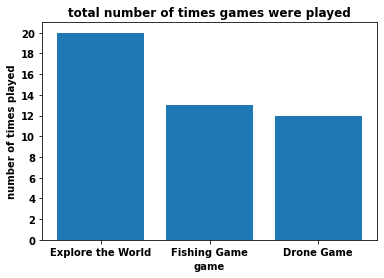

In [62]:
# plot number of games by session
plt.bar(time_gamecount.index,time_gamecount['session_nr']);
plt.xlabel('game')
plt.ylabel('number of times played');
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.title('total number of times games were played');

plt.savefig(results_path + '\\times_played_game.png',bbox_inches = "tight")
plt.show();

**save outputs to txt file**

In [63]:
with open(results_path + '\\outputs.txt', mode='w') as file_:
    file_.write(f'total number of days played = {active_days} days')
    file_.write("\n")  # Next line.
    file_.write(f'total time spent = {total_time[0]:.2f} mins')
    file_.write("\n")  
    file_.write(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')
    file_.write("\n")  

#### Mean/std of Sparc, KxGain (stiffness coeff), Total force, velocity

In [64]:
session_nr = []
game_nr = []
sparc_mean =[]
sparc_std =[]
kx_mean = []
kx_std = []
Ftot_mean = []
Ftot_std = []
vel_mean = []
veldb_mean = []
veldb_std = []

for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            session_nr.append(session)
            game_nr.append(game)
            sparc_mean.append(df_game[['Sparc']].mean().values[0])
            sparc_std.append(df_game[['Sparc']].std().values[0])
            kx_mean.append(df_game[['KxGain']].mean().values[0])
            kx_std.append(df_game[['KxGain']].std().values[0])
            Ftot_mean.append(df_game[['TotalForce']].mean().values[0])
            Ftot_std.append(df_game[['TotalForce']].std().values[0])
            
            # note coord in m
            df_game[['TimeStampMS_diff','x_diff','y_diff']]=df_game[['TimeStampMS','XCoordinate','YCoordinate']].diff()
            df_game['step_size'] = np.sqrt(df_game['x_diff']**2+df_game['y_diff']**2)
            # vel in m/sec
            vel_mean.append((df_game['step_size'].sum())/(df_game['TimeStampMS_diff'].sum()/1000))
            
            # vel from velX and velY from db?
            df_game['vel_db'] = np.sqrt(df_game['VelocityX']**2+df_game['VelocityY']**2)
            veldb_mean.append(df_game[['vel_db']].mean().values[0])
            veldb_std.append(df_game[['vel_db']].std().values[0])

In [65]:
# put in df
gen_parameters = []
for row in range(0,len(session_nr)):
    gen_parameters.append(row)
gen_parameters = pd.DataFrame(gen_parameters,columns=['session_nr'])   
gen_parameters['session_nr'] = session_nr
gen_parameters['game_nr'] = game_nr
gen_parameters['sparc_mean'] = sparc_mean
gen_parameters['sparc_std'] = sparc_std
gen_parameters['kx_mean'] = kx_mean
gen_parameters['kx_std'] = kx_std
gen_parameters['Ftot_mean'] = Ftot_mean
gen_parameters['Ftot_std'] = Ftot_std
gen_parameters['vel_mean'] = vel_mean
gen_parameters['veldb_mean'] = veldb_mean
gen_parameters['veldb_std'] = veldb_std

In [66]:
# gen_parameters

##### Plot mean Sparc

In [67]:
gen_explore = gen_parameters[gen_parameters['game_nr']==0]
gen_fish = gen_parameters[gen_parameters['game_nr']==1]
gen_drone = gen_parameters[gen_parameters['game_nr']==2]

**explore game**

In [68]:
# gen_explore

In [69]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

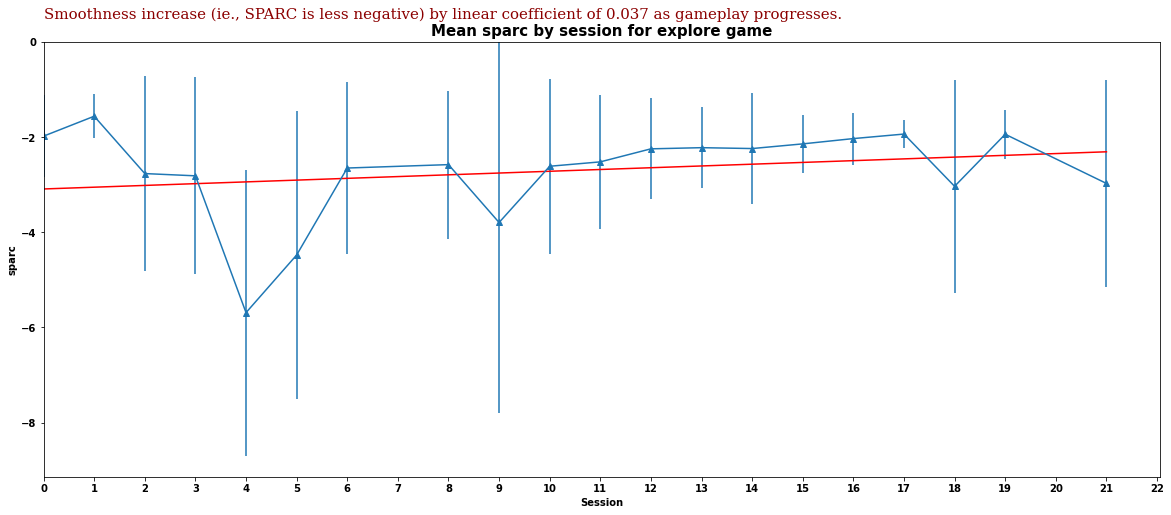

In [70]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['sparc_mean'],gen_explore['sparc_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_explore['session_nr'],gen_explore['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_explore['session_nr'],p(gen_explore['session_nr']),'r-')
# print('y=%.6fx+(%.6f)'%(z[0],z[1]))

if z[0] > 0:
    plt.text(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)
else:
    plt.text(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)

plt.ylabel('sparc')

plt.title('Mean sparc by session for explore game',fontsize=15)

plt.savefig(results_path + '\\sparc_explore.png',bbox_inches = "tight")
plt.show();

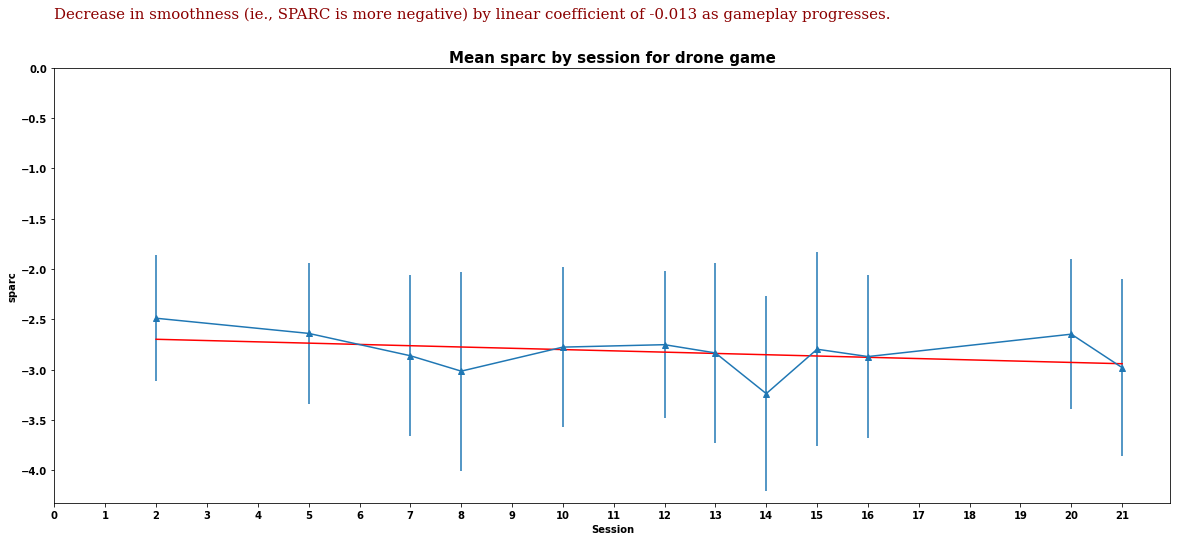

In [71]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['sparc_mean'],gen_drone['sparc_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_drone['session_nr'],gen_drone['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_drone['session_nr'],p(gen_drone['session_nr']),'r-')

if z[0] > 0:
    plt.text(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)
else:
    plt.text(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)

plt.ylabel('sparc')
plt.title('Mean sparc by session for drone game',fontsize=15)

plt.savefig(results_path + '\\sparc_drone.png',bbox_inches = "tight")
plt.show();

##### Plot mean Kx stiffness coeff
only for explore game

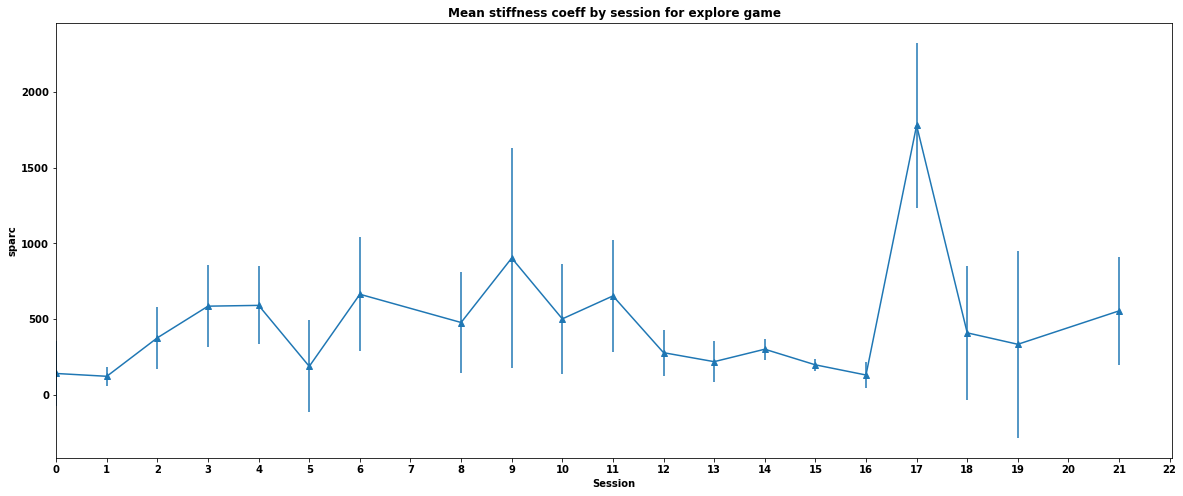

In [72]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['kx_mean'],gen_explore['kx_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('sparc')
plt.title('Mean stiffness coeff by session for explore game')

plt.savefig(results_path + '\\Kx_explore.png',bbox_inches = "tight")
plt.show();

##### Plot mean total force
only for explore game

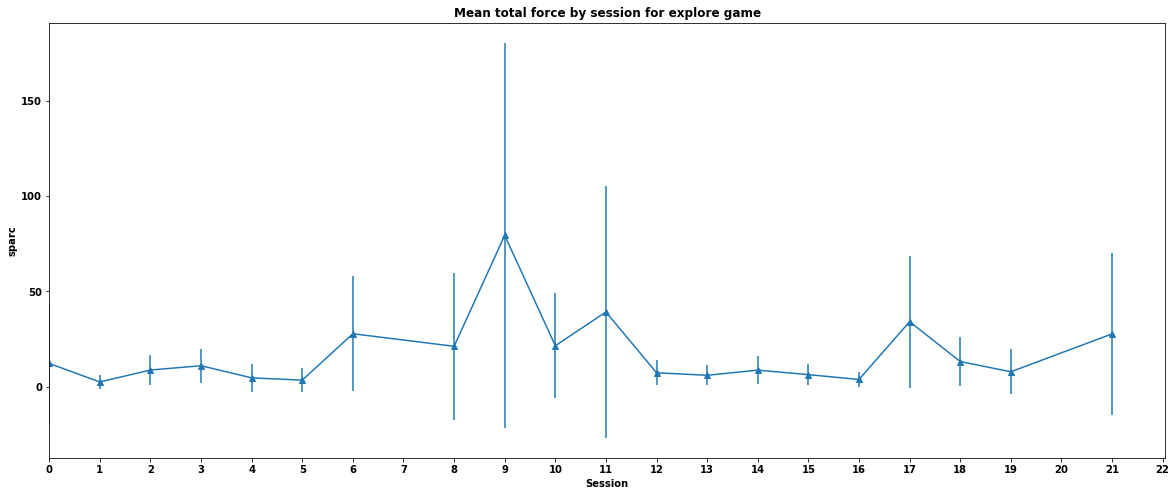

In [73]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['Ftot_mean'],gen_explore['Ftot_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('sparc')
plt.title('Mean total force by session for explore game')

plt.savefig(results_path + '\\Ftotal_explore.png',bbox_inches = "tight")
plt.show();

##### Plot mean velocity (by session)

In [74]:
ex = gen_explore['vel_mean'].mean()
fish = gen_fish['vel_mean'].mean()
dr = gen_drone['vel_mean'].mean()
mean_vel_max=max([ex,fish,dr])

vel_max = gen_parameters['vel_mean'].max()

if ex==mean_vel_max:
    max_vel_game='explore'
elif fish==mean_vel_max:
    max_vel_game='fish'
elif dr==mean_vel_max:
    max_vel_game='drone'
    
print(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')

Max mean velocity of 0.134 m/s occurred during fish game


In [75]:
# save to outputs file
with open(results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')
    file_.write("\n")  # Next line.

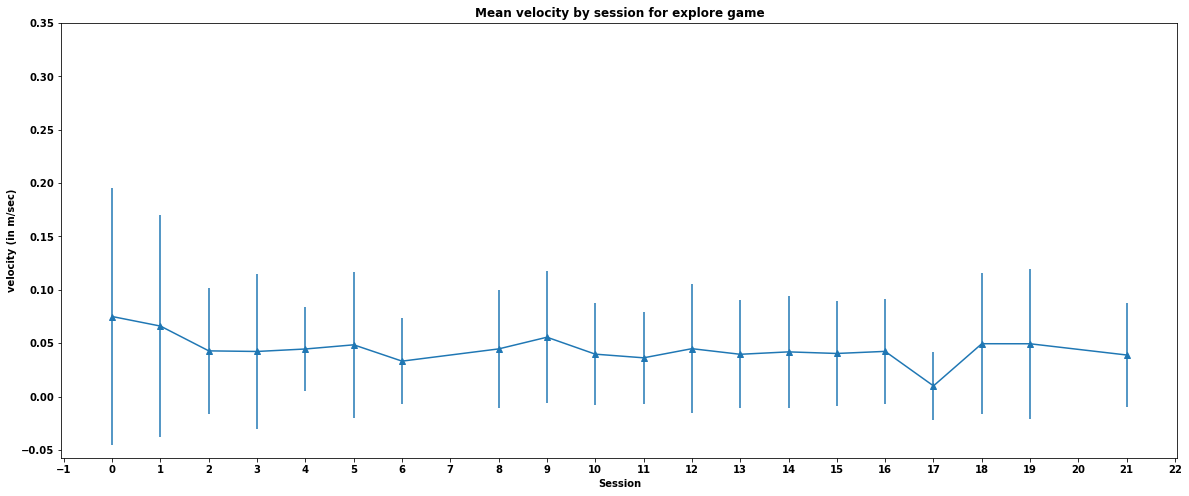

In [76]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['veldb_mean'],gen_explore['veldb_std'], marker='^');
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.35)
plt.title('Mean velocity by session for explore game');

plt.savefig(results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
plt.show();

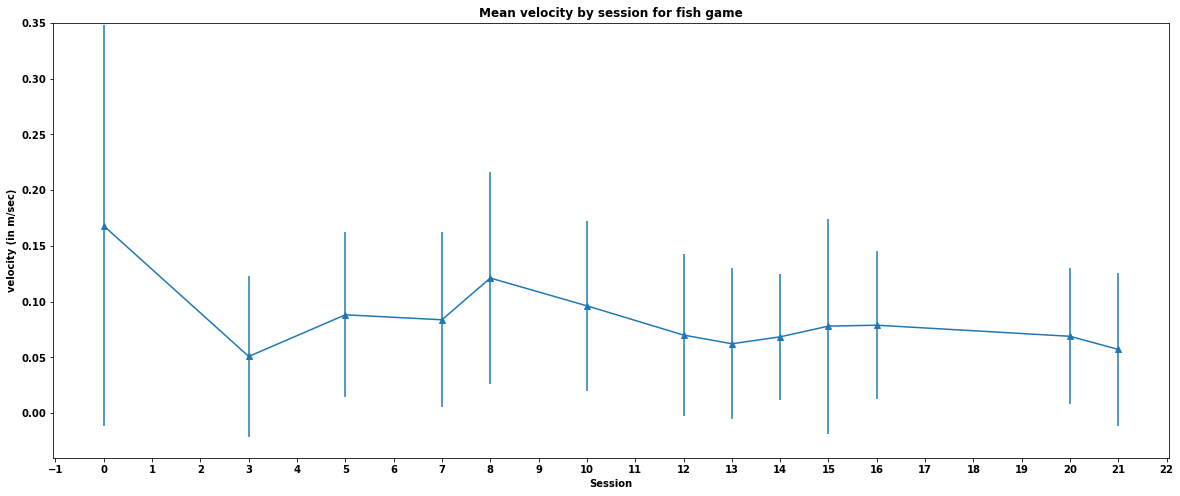

In [77]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_fish['session_nr'],gen_fish['veldb_mean'],gen_fish['veldb_std'], marker='^');

plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.35)
plt.title('Mean velocity by session for fish game')

plt.savefig(results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
plt.show();

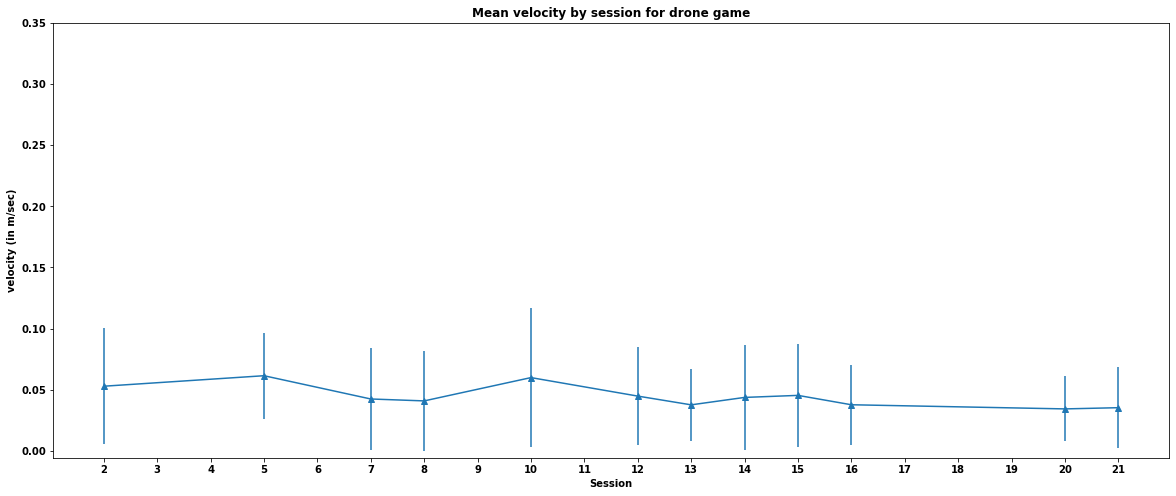

In [78]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['veldb_mean'],gen_drone['veldb_std'], marker='^');

plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.35)
plt.title('Mean velocity by session for drone game')

plt.savefig(results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
plt.show();

In [79]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_explore['session_nr'],gen_explore['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,vel_max])
# plt.title('Mean velocity by session for explore game')

# plt.savefig(results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
# plt.show();

In [80]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_fish['session_nr'],gen_fish['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,vel_max])
# plt.title('Mean velocity by session for fish game')

# plt.savefig(results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
# plt.show();

In [81]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_drone['session_nr'],gen_drone['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,vel_max])
# plt.title('Mean velocity by session for drone game')

# plt.savefig(results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
# plt.show();

#### Smoothness (Sparc)
only for explore[GameID=0] and drone[GameID=2] games
<br> Does SPARC stabilize as gameplay progresses?


**WILL DECIDE HOW TO RE-PLOT THIS**

In [82]:
# # def run_sessions(df_session):
# plt.figure(figsize=(20,10))
# labels=[]
# for session, df in enumerate(df_session):
#     # only plot for explore game
#     game=0
#     if game in df['GameID'].unique():
#         df_game = df[df['GameID']==0]
#         df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

#         plt.step(df_game['tsec'],df_game['Sparc']);
#         labels.append(r'Session{}'.format(session))
        
#     plt.xlim([0,1200])
#     plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
#     plt.xlabel('time/ in sec',fontsize=12)
#     plt.ylabel('sparc',fontsize=12)
#     plt.title('sparc in explore game',fontsize=15);

In [83]:
# plt.figure(figsize=(20,10))
# labels=[]
# for session, df in enumerate(df_session):
#     # only plot for explore game
#     game=2
#     if game in df['GameID'].unique():
#         df_game = df[df['GameID']==2]
#         df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

#         plt.step(df_game['tsec'],df_game['Sparc']);
#         labels.append(r'Session{}'.format(session))

#     plt.xlim([0,700])
#     plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
#     plt.xlabel('time/ in sec',fontsize=12)
#     plt.ylabel('sparc',fontsize=12)
#     plt.title('sparc in drone game',fontsize=15);

#### Plot coordinates

**declare path for saving fig**
<br> new path/folder declared in this section  again

In [84]:
# declared for plotting and savefig
patientid = df['PatientID'].unique()[0]

**determine between assistive 'A' vs perturbation 'P' modes**
<br> assistance: visual == target
<br> perturbation: visual != target (handle trying to reach visual)

In [85]:
def define_haptics(row):
    if row['TargetXCoord']==row['VisualTargetXCoord']:
        row['haptics']='A'
    else:
        row['haptics']='P'
    return row

In [86]:
def plot_coord(tset):
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
       
    ax1.scatter(tset['tsec'],tset['XCoordinate'],s=5,color='red',ls='None',label='X coord');
    if game==0: # only plot for explore
        ax1.scatter(tset['tsec'],tset['TargetXCoord'],s=20,color='green',ls='None',label='X Target');
#         ax1.scatter(tset['tsec'],tset['VisualTargetXCoord_roll'],s=10,color='orange');

        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
            if xc in target_visual['tsec'].values:
                ax1.text(xc,max(tset['TargetXCoord']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
    
    ax1.set_xlim(left=0);
    ax1.set_ylabel('x-coord')
#     ax1.legend(['X coord','X Target'],loc='upper right')
    if game==0:
        ax1.legend(title='A-assistive, P-pertubed',loc='upper right')
    else:
        ax1.legend(loc='upper right')
    ax1.set_title('X coordinates');

    ax2.scatter(tset['tsec'],tset['YCoordinate'],s=5,color='blue',label='Y coord');
    if game==0: # only plot for explore
        ax2.scatter(tset['tsec'],tset['TargetYCoord'],s=20,color='green',label='Y Target');
#         ax2.scatter(tset['tsec'],tset['VisualTargetYCoord_roll'],s=10,color='orange');
        
        my_labels = {'xcoords': 'repeat'}
        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
            if xc in target_visual['tsec'].values:
                ax2.text(xc,max(tset['TargetYCoord']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
            
    ax2.set_xlim(left=0);
    ax2.set_ylabel('y-coord')
    if game==0:
        ax2.legend(title='A-assistive, P-pertubed',loc='upper right')
    else:
        ax2.legend(loc='upper right')
    ax2.set_title('Y coordinates');

    plt.suptitle('Player = {}, Plot coordinates: Session nr={}, Game={} '.format(patientid, session, gamename),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [87]:
for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
            
            # mode change only for explore game
            if game==0:
                # define vertical lines for change in haptics
                df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()

                visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
                df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
                target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
                target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                target_visual = target_visual.apply(define_haptics,axis=1)
                
            if game==0:
                gamename='explore'
            elif game==1:
                gamename='fish'
            elif game==2:
                gamename='drone'
                                      
#             plot_coord(df_game)
            
#             # save fig
#             # note this will overwrite previously saved fig 
#             results_path = os.path.join('data', 'results', patientid, 'coord')
#             if not os.path.exists(results_path):
#                 os.makedirs(results_path)
#             plt.savefig(results_path + '\\fig{}-{}.png'.format(session,gamename))
#             plt.show()

#### Plot K_xx and Force

In [88]:
def plot_k_force(tset):
    # only plot for explore game
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    # plot K
    ax1.scatter(tset['tsec'],tset['KxGain'],s=5,color='blue',label='K_xx');
    # only calculate/plot for explore game
    if game==0: 
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
            if xc in target_visual['tsec'].values:
                ax1.text(xc,max(tset['KxGain']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
                
    ax1.set_xlim(left=0);
    ax1.set_ylabel('K_xx')
    ax1.legend(title='A-assistive, P-pertubed', loc='upper right')
    ax1.set_title('K_xx');

    # plot forces
    ax2.axhline(y=21, color='green', linestyle='--',label='F_max')
    ax2.scatter(tset['tsec'],tset['TotalForce'],s=6,color='red',label='F_total');
    ax2.scatter(tset['tsec'],tset['F_spring'],s=3,color='cyan',label='F_spring');
    ax2.scatter(tset['tsec'],tset['F_sens'],s=3,color='black',label='F_sens');
    
    if game==0: # only plot for explore
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}

        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
            if xc in target_visual['tsec'].values:
                ax2.text(xc,max(tset['F_spring']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
            
    ax2.set_xlim(left=0);
    ax2.set_ylabel('Force/N')
    ax2.legend(title='A-assistive, P-pertubed', loc='upper right')
    ax2.set_title('Total Force');
    
    plt.suptitle('Player = {}, Plot K_xx and Forces: Session nr={}, Game=explore'.format(patientid, session),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [89]:
rp = 0.016
J_p_th = np.array([[rp/2,rp/2],[rp/2,-rp/2]])
J_p_th = np.transpose(J_p_th)

session_nr = []
game_nr = []
F_deficit_mean = []
F_deficit_std = []
Ftot_21 = []
for session, df in enumerate(df_session):
    # only calculate/plot for explore game
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        # distance to target
        df_game['dist_targ'] = np.sqrt((df_game['TargetXCoord'] - df_game['XCoordinate'])**2 + (df_game['TargetYCoord'] - df_game['YCoordinate'])**2)
        df_game['F_spring'] = df_game['KxGain']*df_game['dist_targ']
        
        # define vertical lines for change in haptics
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()

        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
        target_visual = target_visual.apply(define_haptics,axis=1)

        df_game['tau_a_left'] = 0.0398*df_game['CurrentSenseLeft']
        df_game['tau_a_right'] = 0.0398*df_game['CurrentSenseRight']

        F_sens = []
        for i in range(0,len(df_game['tau_a_left'])):
            # matlab's equivalent in the least squares sense to the under- or overdetermined system of equations AX = B
            mat = np.linalg.lstsq(J_p_th , np.array([df_game['tau_a_left'].iloc[i], df_game['tau_a_right'].iloc[i] 
                                                    ]).reshape(2,1))[0]
            mat_norm = np.linalg.norm(mat,1)
            F_sens.append(mat_norm)
        df_game['F_sens'] = F_sens
        df_game['F_deficit'] = df_game['TotalForce']/df_game['F_sens']
        
        # in df
        session_nr.append(session)
        game_nr.append(game)
        F_deficit_mean.append(df_game[['F_deficit']].mean().values[0])
        F_deficit_std.append(df_game[['F_deficit']].std().values[0])
        # convert to sec, convert to percentage
        Ftot_21.append((df_game[df_game['TotalForce']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        
        # put in df
        F_parameters = []
        for row in range(0,len(session_nr)):
            F_parameters.append(row)
        F_parameters = pd.DataFrame(F_parameters,columns=['session_nr'])   
        F_parameters['session_nr'] = session_nr
        F_parameters['game_nr'] = game_nr
        F_parameters['F_deficit_mean'] = F_deficit_mean
        F_parameters['F_deficit_std'] = F_deficit_std
        F_parameters['Ftot_21'] = Ftot_21
        
        # plot
#         plot_k_force(df_game)
        
#         # save fig
#         # note this will overwrite previously saved fig 
#         results_path = os.path.join('data', 'results', patientid, 'stiffness_force')
#         if not os.path.exists(results_path):
#             os.makedirs(results_path)
#         plt.savefig(results_path + '\\fig{}-explore.png'.format(session))
#         plt.show()

#### Mean/std of Force parameters

In [90]:
# F_parameters

##### Plot Force deficit (ratio)

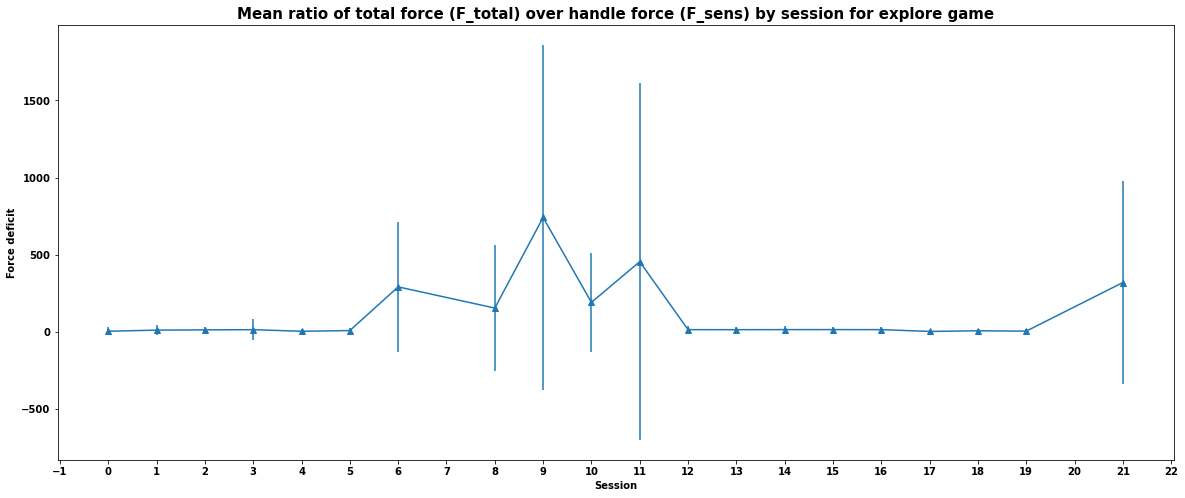

In [91]:
plt.figure(figsize=(20,8))
plt.errorbar(F_parameters['session_nr'],F_parameters['F_deficit_mean'],F_parameters['F_deficit_std'], marker='^');
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Force deficit')

plt.title('Mean ratio of total force (F_total) over handle force (F_sens) by session for explore game',fontsize=15);

plt.savefig(results_path + '\\force_deficit_explore.png',bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F>maximum force (21N)

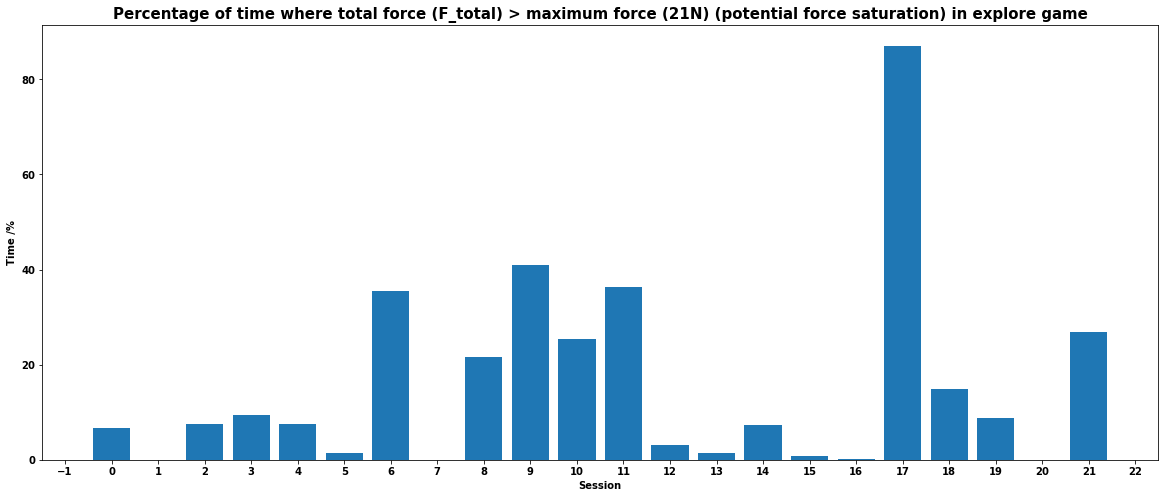

In [92]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Ftot_21']);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Time /%')

plt.title('Percentage of time where total force (F_total) > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(results_path + '\\force_larger21.png', bbox_inches = "tight")
plt.show();

In [93]:
print(f'total run time = {datetime.now()-start_codes}')

total run time = 0:01:48.238957
